In [ ]:
!pip install acoustics

In [1]:
import cusignal
import acoustics
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

### Data Creation
http://python-acoustics.github.io/python-acoustics/cepstrum.html

In [2]:
duration = 5.0
fs = 8000.0
samples = int(fs*duration)
t = np.arange(samples) / fs

fundamental = 100.0
harmonics = np.arange(1, 30) * fundamental
signal = np.sin(2.0*np.pi*harmonics[:,None]*t).sum(axis=0)

gpu_signal = cp.asarray(signal)

### Real Cepstrum

In [3]:
%%timeit
rceps = acoustics.cepstrum.real_cepstrum(signal)

1.49 ms ± 9.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%%timeit
gpu_rceps = cusignal.real_cepstrum(gpu_signal)
cp.cuda.Device(0).synchronize()

251 µs ± 4.64 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Complex Cepstrum

In [5]:
%%timeit
cceps, _ = acoustics.cepstrum.complex_cepstrum(signal)

3.28 ms ± 53.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
gpu_cceps, _ = cusignal.complex_cepstrum(gpu_signal)
cp.cuda.Device(0).synchronize()

413 µs ± 3.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Plots

CPU Results

(-5.0, 10.0)

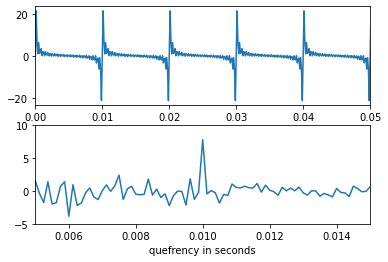

In [7]:
cceps, _ = acoustics.cepstrum.complex_cepstrum(signal)

fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal)
ax0.set_xlabel('time in seconds')
ax0.set_xlim(0.0, 0.05)
ax1 = fig.add_subplot(212)
ax1.plot(t, cceps)
ax1.set_xlabel('quefrency in seconds')
ax1.set_xlim(0.005, 0.015)
ax1.set_ylim(-5., +10.)

GPU Results

(-5.0, 10.0)

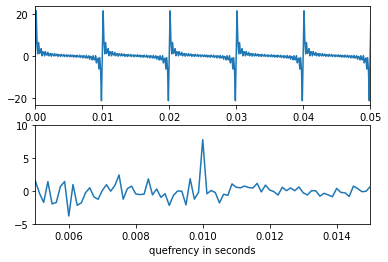

In [8]:
gpu_cceps, _ = cusignal.complex_cepstrum(gpu_signal)
cp.cuda.Device(0).synchronize()

fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, cp.asnumpy(gpu_signal))
ax0.set_xlabel('time in seconds')
ax0.set_xlim(0.0, 0.05)
ax1 = fig.add_subplot(212)
ax1.plot(t, cp.asnumpy(gpu_cceps))
ax1.set_xlabel('quefrency in seconds')
ax1.set_xlim(0.005, 0.015)
ax1.set_ylim(-5., +10.)